**Rozdział 1. Krajobraz uczenia maszynowego**

_Poniższy kod służy do generowania niektórych rysunków umieszczonych w rozdziale 1._

# Konfiguracja

Upewnijmy się najpierw, że notatnik ten będzie działał w środowiskach Python 2 i 3, importujmy kilka powszechnie stosowanych modułów, upewnijmy się, że moduł MatplotLib będzie prawidłowo tworzył wykresy, a także przygotujmy funkcję zapisującą rysunki:

In [54]:
# Obsługa środowisk Python 2 i Python 3
from __future__ import division, print_function, unicode_literals

# Importowanie popularnych modułów
import numpy as np
import numpy.random as rnd
import os

# W celu zachowania powtarzalności wyników w kolejnych przebiegach
rnd.seed(42)

# Generowanie ładnych wykresów
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Lokacja, w której będą zapisywane rysunki
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "podstawy"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID, fig_id + ".png")
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Przykładowy kod 1.1

Poniższa funkcja scala jedynie dane dotyczące satysfkacji z życia z zestawu OECD oraz informacje o PKB per capita. Jest on dość długi, nudny i niepowiązany bezpośrednio z uczeniem maszynowym, dlatego pominąłem go w książce.

In [55]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Umieszczony w książce kod wyszukuje pliki danych w bieżącym katalogu. Dostosowałem go tutaj tak, aby pobierał dane z katalogu zestawy danych/satysfakcja.

In [56]:
import os
datapath = os.path.join("zestawy danych", "satysfakcja", "")

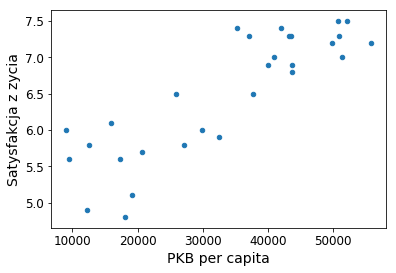

[[ 5.96242338]]


In [57]:
# Importowane klasy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Wczytuje dane
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Przygotowuje dane
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.rename(columns={"GDP per capita": "PKB per capita"}, inplace=True)
country_stats.rename(columns={"Life satisfaction": "Satysfakcja z zycia"}, inplace=True)

# Wizualizuje dane
country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia')
plt.show()

# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

# Uczy model
model.fit(X, y)

# Oblicza prognozy dla Cypru
X_new = [[22587]]  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki [[ 5.96242338]]

# Uwaga: możesz zignorować pozostałą część tego notatnika, gdyż służy on wyłącznie do wygenerowania wielu rysunków użytych w rozdziale 1.

# Wczytanie i przygotowanie danych satysfakcji z życia

In [13]:
import pandas as pd

# Plik CSV jest dostępny do pobrania na stronie http://stats.oecd.org/index.aspx?DataSetCode=BLI
datapath = "zestawy danych/satysfakcja/"

oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [14]:
oecd_bli.rename(columns={"Life satisfaction": "Satysfakcja z zycia"}, inplace=True)
oecd_bli["Satysfakcja z zycia"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Satysfakcja z zycia, dtype: float64

# Wczytanie i przygotowanie danych PKB per capita

In [15]:
# Download data from http://goo.gl/j1MSKe (=> imf.org)
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "PKB per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [16]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="PKB per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [17]:
full_country_stats[["PKB per capita", 'Satysfakcja z zycia']].loc["United States"]

PKB per capita         55805.204
Satysfakcja z zycia        7.200
Name: United States, dtype: float64

In [19]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["PKB per capita", 'Satysfakcja z zycia']].iloc[keep_indices]
missing_data = full_country_stats[["PKB per capita", 'Satysfakcja z zycia']].iloc[remove_indices]

Zapisywanie rysunku wykres_punktowy_pieniądze_i_szczęście


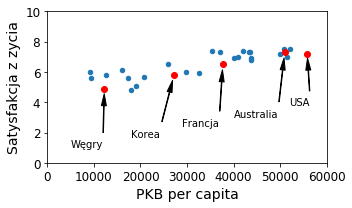

In [21]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "USA" if country == "United States" else country
    country = "Węgry" if country == "Hungary" else country
    country = "Francja" if country == "France" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('wykres_punktowy_pieniądze_i_szczęście')
plt.show()

In [22]:
sample_data.to_csv("satysfakcja_z_zycia_a_PKB_per_capita.csv")

In [23]:
sample_data.loc[list(position_text.keys())]

,PKB per capita,Satysfakcja z zycia
Country,,
Australia,50961.865,7.3
Hungary,12239.894,4.9
Korea,27195.197,5.8
United States,55805.204,7.2
France,37675.006,6.5


Zapisywanie rysunku wykres_poprawiania_parametrów_modelu


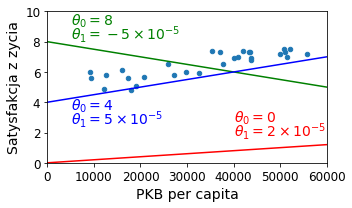

In [24]:
import numpy as np

sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('wykres_poprawiania_parametrów_modelu')
plt.show()

In [25]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z zycia"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.8530528002664362, 4.9115445891584831e-05)

Zapisywanie rysunku wykres_najlepiej_dopasowanego_modelu


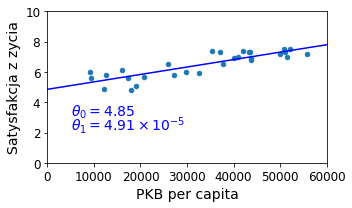

In [26]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('wykres_najlepiej_dopasowanego_modelu')
plt.show()


In [27]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["PKB per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.9624474431881502

Zapisywanie rysunku wykres_prognoz_dla_Cypru


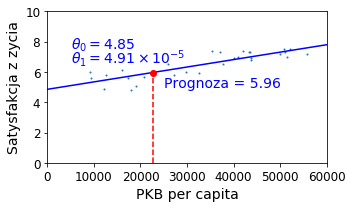

In [28]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prognoza = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('wykres_prognoz_dla_Cypru')
plt.show()

In [29]:
sample_data[7:10]

,PKB per capita,Satysfakcja z zycia
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [30]:
(5.1+5.7+6.5)/3

5.766666666666667

In [31]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

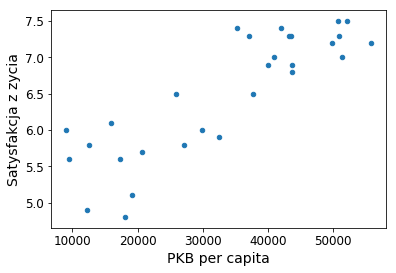

[[ 5.96242338]]


In [32]:
# Importuje klasy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# Wczytuje dane
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Przygotowuje dane
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["PKB per capita"]]
y = np.c_[country_stats["Satysfakcja z zycia"]]

# Wizualizuje dane
country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia')
plt.show()

# Wybiera model liniowy
model = sklearn.linear_model.LinearRegression()

# Uczy model
model.fit(X, y)

# Oblicza prognozę dla Cypru
X_new = [[22587]]  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki [[ 5.96242338]]

In [33]:
oecd_bli, gdp_per_capita = backup

In [34]:
missing_data

,PKB per capita,Satysfakcja z zycia
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [35]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Zapisywanie rysunku wykres_punktowy_reprezentatywnych_danych_uczących


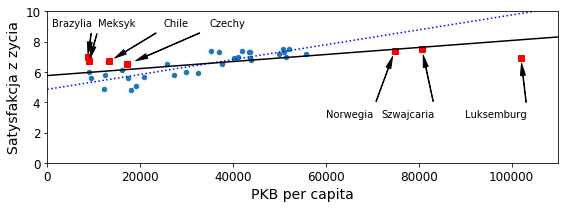

In [37]:
sample_data.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    country = "Brazylia" if country == "Brazil" else country
    country = "Meksyk" if country == "Mexico" else country
    country = "Czechy" if country == "Czech Republic" else country
    country = "Norwegia" if country == "Norway" else country
    country = "Szwajcaria" if country == "Switzerland" else country
    country = "Luksemburg" if country == "Luxembourg" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["PKB per capita"]]
yfull = np.c_[full_country_stats["Satysfakcja z zycia"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

save_fig('wykres_punktowy_reprezentatywnych_danych_uczących')
plt.show()

Zapisywanie rysunku wykres_przetrenowanego_modelu


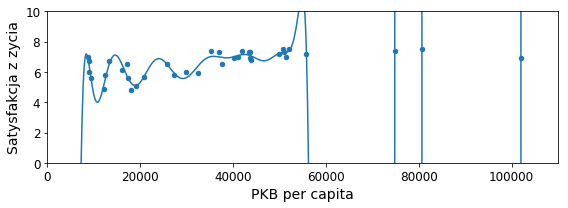

In [48]:
full_country_stats.plot(kind='scatter', x="PKB per capita", y='Satysfakcja z zycia', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
save_fig('wykres_przetrenowanego_modelu')
plt.show()

In [39]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Satysfakcja z zycia"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Satysfakcja z zycia, dtype: float64

In [40]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,PKB per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Zapisywanie rysunku wykres_modelu_grzbietowego


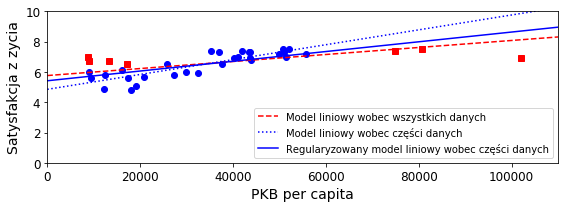

In [49]:
plt.figure(figsize=(8,3))

plt.xlabel("PKB per capita")
plt.ylabel('Satysfakcja z zycia')

plt.plot(list(sample_data["PKB per capita"]), list(sample_data["Satysfakcja z zycia"]), "bo")
plt.plot(list(missing_data["PKB per capita"]), list(missing_data["Satysfakcja z zycia"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Model liniowy wobec wszystkich danych")
plt.plot(X, t0 + t1*X, "b:", label="Model liniowy wobec części danych")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["PKB per capita"]]
ysample = np.c_[sample_data["Satysfakcja z zycia"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularyzowany model liniowy wobec części danych")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
save_fig('wykres_modelu_grzbietowego')
plt.show()

In [42]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [43]:
# Zastępuje ten model liniowy:
model = sklearn.linear_model.LinearRegression()

In [44]:
# modelem regresji k-najbliższych sąsiadów:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [45]:
X = np.c_[country_stats["PKB per capita"]]
y = np.c_[country_stats["Satysfakcja z zycia"]]

# Uczy model
model.fit(X, y)

# Oblicza prognozę dla Cypru
X_new = np.array([[22587.0]])  # PKB per capita Cypru
print(model.predict(X_new)) # wyniki [[ 5.76666667]]

[[ 5.76666667]]
